In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, desc, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)

In [10]:
#find date column in either Measure or Station table
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


In [11]:
#find date column in either Measure or Station table
columns = inspector.get_columns('Station')
for column in columns:
    print(column['name'])

id
station
name
latitude
longitude
elevation


In [12]:
#Get all dates
session.query(Measure.date).order_by(desc(Measure.date)).all()

[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08

In [13]:
# Find the most recent date in the data set.
session.query(Measure.date).order_by(desc(Measure.date)).first()

('2017-08-23',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measure.date).order_by(desc(Measure.date)).first()[0]
most_recent_date


'2017-08-23'

In [15]:
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measure.date, Measure.prcp).filter(Measure.date >= one_year_ago).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
prcp_df

# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values('Date')
prcp_df_sorted


,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


<function matplotlib.pyplot.show(close=None, block=None)>

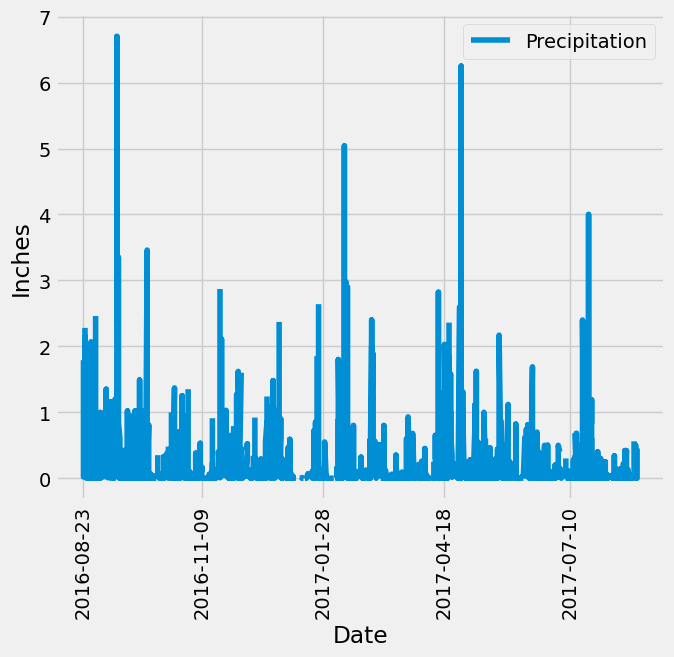

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(7,6))
plt.plot(prcp_df_sorted['Date'], prcp_df_sorted['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout
plt.legend()

#set xticks
custom_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(custom_dates, rotation=90)

plt.show

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
#The first session.query station count produced 9
#session.query(Station.station).count()

count_result = [(session.query(Station.station).count(),)]

print(count_result)

[(9,)]


In [21]:
station_counts = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
    order_by(func.count(Measure.station).desc()).all()

for stat in station_counts:
    print (stat)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
    order_by(func.count(Measure.station).desc()).all()


for stat in station_counts:
    print(stat)



('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = [session.query(func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)).filter(Measure.station == 'USC00519281').first(),]
print(most_active)

[(54.0, 85.0, 71.66378066378067)]


In [24]:
station_graph = session.query(Measure.date, Measure.station, Measure.tobs).filter(Measure.station == 'USC00519281').order_by(Measure.date.desc()).all()
station_graph

[('2017-08-18', 'USC00519281', 79.0),
 ('2017-08-17', 'USC00519281', 76.0),
 ('2017-08-16', 'USC00519281', 76.0),
 ('2017-08-15', 'USC00519281', 77.0),
 ('2017-08-14', 'USC00519281', 77.0),
 ('2017-08-13', 'USC00519281', 77.0),
 ('2017-08-06', 'USC00519281', 83.0),
 ('2017-08-05', 'USC00519281', 82.0),
 ('2017-08-04', 'USC00519281', 77.0),
 ('2017-07-31', 'USC00519281', 76.0),
 ('2017-07-30', 'USC00519281', 81.0),
 ('2017-07-29', 'USC00519281', 82.0),
 ('2017-07-28', 'USC00519281', 81.0),
 ('2017-07-27', 'USC00519281', 76.0),
 ('2017-07-26', 'USC00519281', 75.0),
 ('2017-07-25', 'USC00519281', 77.0),
 ('2017-07-24', 'USC00519281', 75.0),
 ('2017-07-23', 'USC00519281', 82.0),
 ('2017-07-22', 'USC00519281', 77.0),
 ('2017-07-21', 'USC00519281', 77.0),
 ('2017-07-20', 'USC00519281', 77.0),
 ('2017-07-19', 'USC00519281', 76.0),
 ('2017-07-18', 'USC00519281', 76.0),
 ('2017-07-17', 'USC00519281', 76.0),
 ('2017-07-16', 'USC00519281', 80.0),
 ('2017-07-15', 'USC00519281', 80.0),
 ('2017-07-1

In [25]:
#calculate last 12 months
twelve_months_ago = dt.date(2017, 8, 18) - dt.timedelta(days=365)
twelve_months_ago

datetime.date(2016, 8, 18)

In [26]:
station_graph = session.query(Measure.date, Measure.tobs).filter(Measure.station == 'USC00519281').filter(Measure.date >= twelve_months_ago).all()
station_graph

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [27]:
#create temperature results
temperatures = [result.tobs for result in station_graph]

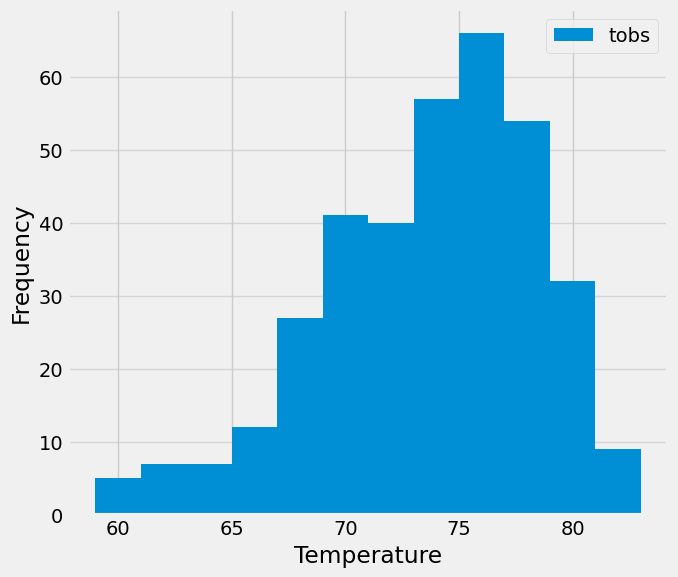

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(7,6))
plt.hist(temperatures, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.legend()

plt.tight_layout()
plt.show()

# Close Session

In [38]:
# Close Session
session.close()